In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from glob import glob

In [ ]:
json_path = '/preurp/deep-q-learning/logs/'

In [2]:
temp = [y for x in os.walk(json_path) for y in glob(os.path.join(x[0], '*.json'))]

In [3]:
temp.sort()
json_dir = temp

In [4]:
data = {}
for i in range(len(json_dir)):
    with open(json_dir[i]) as json_file:
        data[i] = json.load(json_file)
start_epi = 1

In [5]:
acc_step = {}
loss_step = {}
acc_epi = {}
loss_epi = {}

for trial in range(len(json_dir)):
    epi_num = len(data[trial].keys()) - 2
    for i in range(start_epi, epi_num):
        epi = str(i)
        if i == start_epi:
            acc_step[trial] = np.zeros(0)
            loss_step[trial] = np.zeros(0)
            acc_epi[trial] = np.zeros(epi_num-start_epi)
            loss_epi[trial] = np.zeros(epi_num-start_epi)
        data_arr = np.array(data[trial][epi])
        acc_step[trial] = np.concatenate((acc_step[trial], data_arr[:,0]), axis=0)
        loss_step[trial] = np.concatenate((loss_step[trial], data_arr[:,1]), axis=0)
        
        acc_epi[trial][i-start_epi] = np.mean(data_arr[:,0])
        loss_epi[trial][i-start_epi] = np.mean(data_arr[:,1])

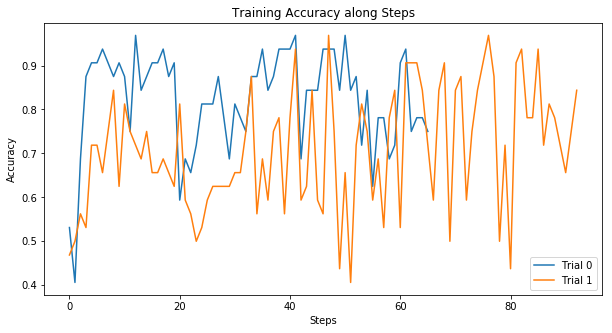

In [6]:
# acc_step plot
fig = plt.figure(figsize=(10,5))

for i in range(len(acc_step.keys())):
    plt.plot(acc_step[i], label='Trial {}'.format(i))

plt.legend()
plt.title("Training Accuracy along Steps")
plt.xlabel("Steps")
plt.ylabel("Accuracy")
plt.show()

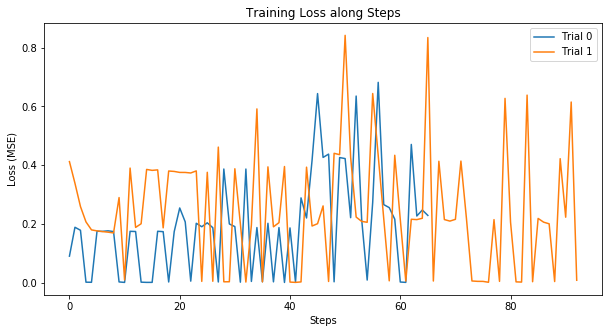

In [7]:
# loss_step plot
fig = plt.figure(figsize=(10,5))

for i in range(len(acc_step.keys())):
    plt.plot(loss_step[i], label='Trial {}'.format(i))

plt.legend()
plt.title("Training Loss along Steps")
plt.xlabel("Steps")
plt.ylabel("Loss (MSE)")
plt.show()

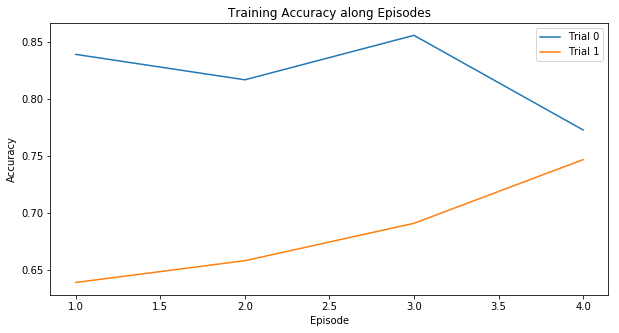

In [8]:
# acc_epi plot
fig = plt.figure(figsize=(10,5))

for i in range(len(acc_epi.keys())):
    epi_tick = np.arange(start_epi,len(acc_epi[i])+start_epi)
    plt.plot(epi_tick, acc_epi[i], label='Trial {}'.format(i))

plt.legend()
plt.title("Training Accuracy along Episodes")
plt.xlabel("Episode")
plt.ylabel("Accuracy")
plt.show()

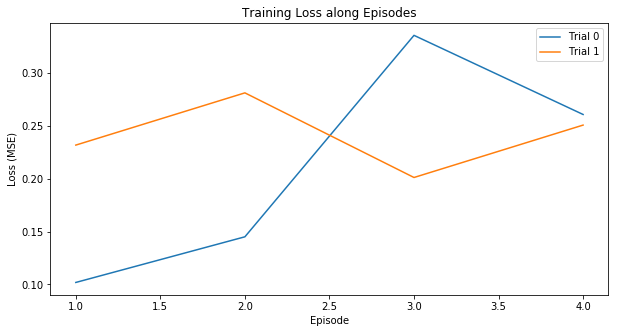

In [9]:
# loss_epi plot
fig = plt.figure(figsize=(10,5))

for i in range(len(acc_step.keys())):
    epi_tick = np.arange(start_epi,len(loss_epi[i])+start_epi)
    plt.plot(epi_tick, loss_epi[i], label='Trial {}'.format(i))

plt.legend()
plt.title("Training Loss along Episodes")
plt.xlabel("Episode")
plt.ylabel("Loss (MSE)")
plt.show()

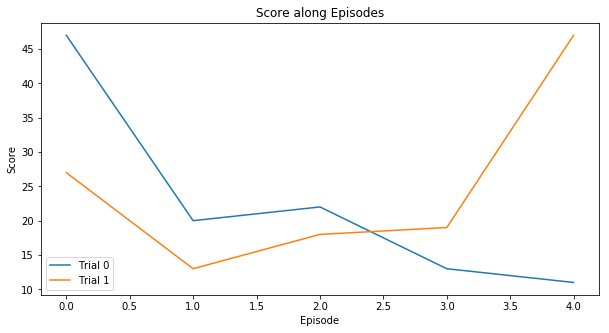

In [10]:
fig = plt.figure(figsize=(10,5))

for trial in range(len(data.keys())):
    plt.plot(data[trial]["score"], label="Trial {}".format(trial))
    
plt.legend()
plt.title("Score along Episodes")
plt.xlabel("Episode")
plt.ylabel("Score")
plt.show()

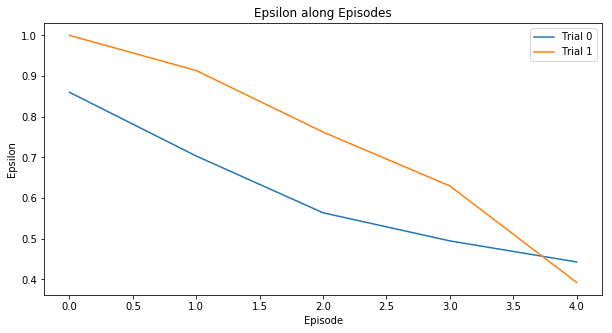

In [11]:
fig = plt.figure(figsize=(10,5))

for trial in range(len(data.keys())):
    plt.plot(data[trial]["epsilon"], label="Trial {}".format(trial))
    
plt.legend()
plt.title("Epsilon along Episodes")
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.show()